Code to visualize data for Methane flux project (Andrea Gaspert, last modified 04/06/2020)

--> had to load csv files locally for now, accessing drive directly from code was a mess for authentification problems, will look into it


In [52]:
#import important packages
import numpy as np
import matplotlib.pyplot as plt


Code to extract desired csv file from the drive
List of available data sites on github:

ATNEU_V2
DEHTE_V2
USA03_V2

data --> [timestamp,FCH4,VPD,RH,PA,TA,FCH4_F,VPD_F,RH_F,PA_F,TA_F]

In [53]:
site_id = 'ATNEU_V2' #change with desired site
local_path = 'Documents\\Research\\spring\\Jackson\\code\\data\\Daily\\' #change with how locally setup
file_path = local_path + site_id +'.csv'

data = np.genfromtxt(file_path, delimiter=',', skip_header=1, usecols=(2,7,17,18,19,20,37,45,46,47,48))



Find earliest and latest date at which methane flux data available in file

In [54]:
true_if_data = np.nan_to_num(data[:,1])> 0 #1 where data is a number, 0 elsewhere
position_data = np.where(true_if_data)[0] #positions of where data available

earliest = int(data[:,0][position_data[0]])
latest = int(data[:,0][position_data[-1]])

print('earliest: {} , latest: {}'.format(earliest, latest))

earliest: 201004171165 , latest: 201202261165


Choose when to start and when to end (within available dates)

In [50]:
start = earliest
end = latest

id_start = np.where(data[:,0] == float(start))[0][0]
id_end = np.where(data[:,0] == float(end))[0][0]

Plot desired values

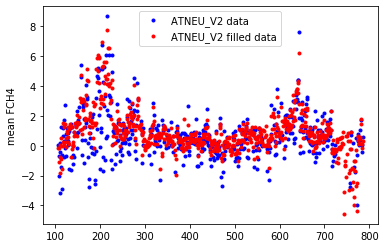

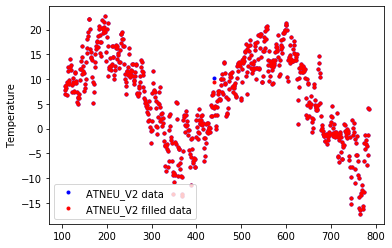

In [51]:
#convert data stamps to proper time x axis to do

time_axis = np.arange(id_start,id_end)

plt.plot(time_axis,data[:,1][id_start:id_end],'b.',label=site_id+' data') #data for mean methane fluxes
plt.plot(time_axis,data[:,6][id_start:id_end],'r.',label=site_id+' filled data') #filled data
plt.ylabel('mean FCH4')
plt.legend(loc='best')
plt.show()

plt.plot(time_axis,data[:,5][id_start:id_end],'b.',label=site_id+' data') #data for temperature
plt.plot(time_axis,data[:,10][id_start:id_end],'r.',label=site_id+' filled data') #filled data
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.show()